# Install and Import Modules

In [1]:
# Installing the required modules 
!pip install opencv-python
!pip install matplotlib
!pip install numpy

  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp311-cp311-win_amd64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.0-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/6 [pyparsing]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- --

In [2]:
# Installing the CPU and CUDA
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install easyocr

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.7.0%2Bcu118-cp311-cp311-win_amd64.whl.metadata (29 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.22.0%2Bcu118-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.0%2Bcu118-cp311-cp311-win_amd64.whl.metadata (6.8 kB)
  Using cached https://download.pytorch.org/whl/filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached https://download.pytorch.org/whl/networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached https://download.pytorch.org/whl/Jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached https://download.pytorch.org/whl/fsspec-2024.6.1-py3-none-any.whl.metadata (11 kB)
  Using cached https://download.pytorch.org/whl/mpmath-1.3.0-py3-none-any.whl (536 kB)
  Usi

In [3]:
# Importing the different libraries
import cv2 
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Defining the path of images

In [31]:
# Optional by defining the path of each images
img0_path = './images/text0.jpg'
img1_path = './images/text1.jpg'
img2_path = './images/text2.jpg'
img3_path = './images/text3.jpg'
img4_path = './images/text4.jpg'

In [32]:
# Extracting the path of images one by one in the form of list
img_path = "./images/"
create_path = lambda f : os.path.join(img_path, f)
test_image_files = os.listdir(img_path)

for f in test_image_files:
    print(f)

text0.jpeg
text1.jpeg
text2.jpg
text3.jpg
text4.jpg


In [60]:
# loading the path of image by passing the position of the image
img = test_image_files[4]
path = create_path(img)

# Recognizing the text from images

In [61]:
# Recognise the text
def recognize_text(img_path):
    ''' loads an image and recognizes text. '''
    
    reader = easyocr.Reader(['en'])        # For English - 'en'  And,  For Hindi - 'hi'
    return reader.readtext(img_path)

In [62]:
result = recognize_text(path)

In [63]:
result

[([[5, 0], [71, 0], [71, 17], [5, 17]], 'acoccu', 0.15846718470637497)]

# Loading the image

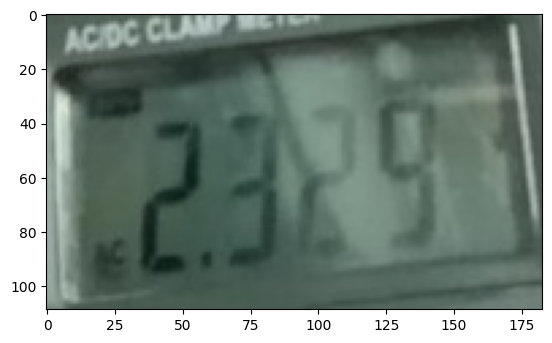

In [64]:
# Showing the current(Selected) image
img_1 = cv2.imread(path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

# Process of Extraction

In [69]:
def overlay_ocr_text(img_path, save_name):
    ''' loads an image, recognize text, and overlays the tet on the image. '''
    
    # Load images
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)
    
    # Recognise text
    result = recognize_text(img_path)
    
    # If OCR prob is over 0.2, overlay bounding box and text
    for(bbox, text, prob) in result:
        if prob >= 0.2:
            print(f'Detected text: {text} (Probability: {prob:.2f})')
            
            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
            
            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255,0,0), thickness=10)
            
            # put recogized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,0,0), thickness=8)
            
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./Output/{save_name}_overlay.jpg', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

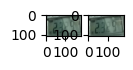

In [70]:
overlay_ocr_text(path, 'Text3_Output')

# Final Output(text) 

In [71]:
# Extracting text from the image
def ocr_text(img_path):
    
    result = recognize_text(img_path)
    
    # If OCR prob is over 0.2, overlay text
    for(bbox, text, prob) in result:
        if prob:
            print(f'{text}')
            

In [72]:
# Extracted Text
ocr_text(path)

acoccu
